# 1. Start the project by doing exploratory data analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('C:\\Users\\Charles Chen\\Desktop\\Python Tutorial 1\\Kaggle\\house-prices-advanced-regression-techniques\\train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2. Look for missing values

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

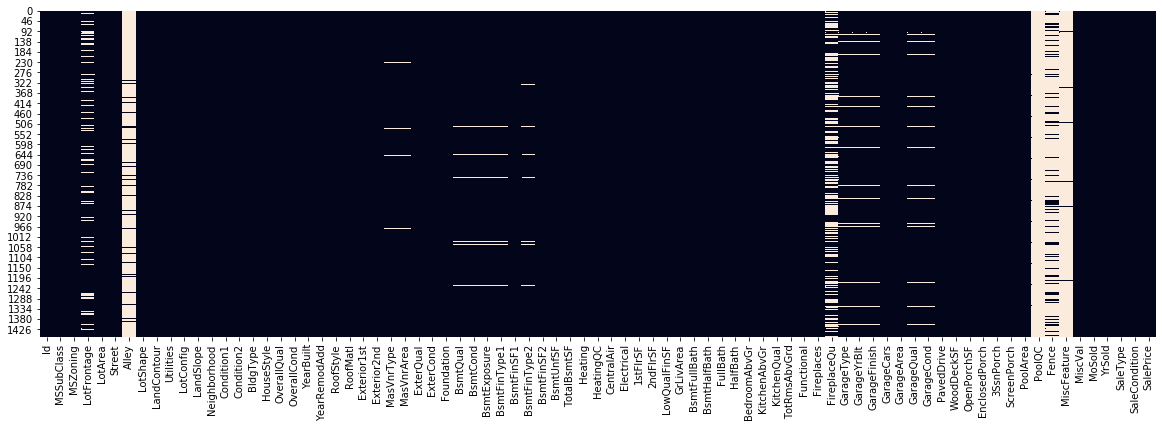

In [9]:
plt.figure(figsize = (20,6))
sns.heatmap(df.isnull(), cbar = False)

In [10]:
df.columns[df.isnull().mean() > 0.2]

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

# 2.1 Delete columns with missing values over 20%

In [11]:
df.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [12]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500


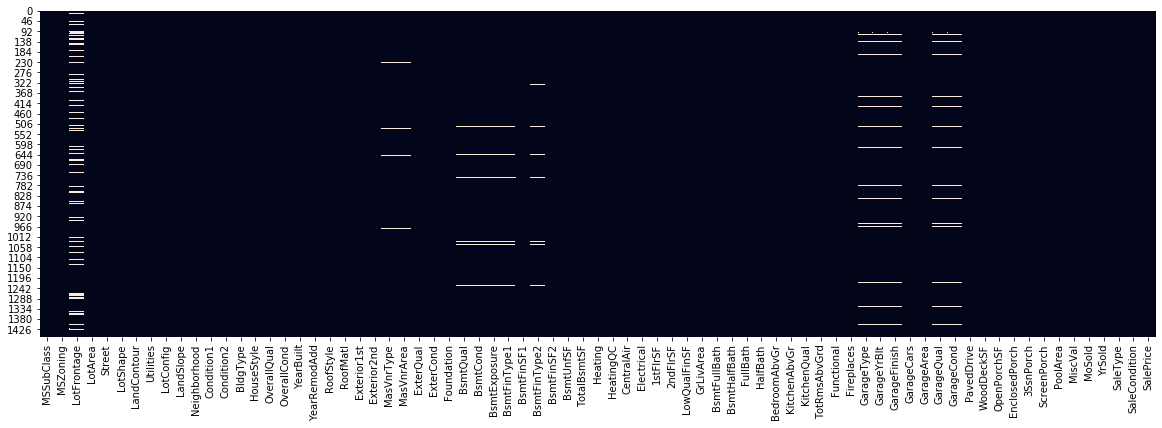

In [13]:
plt.figure(figsize = (20,6))
sns.heatmap(df.isnull(), cbar = False);

In [14]:
df.LotFrontage.isnull().sum()/len(df.LotFrontage)

0.1773972602739726

# 2.2 Look for correlation

In [15]:
corr = df.corr()

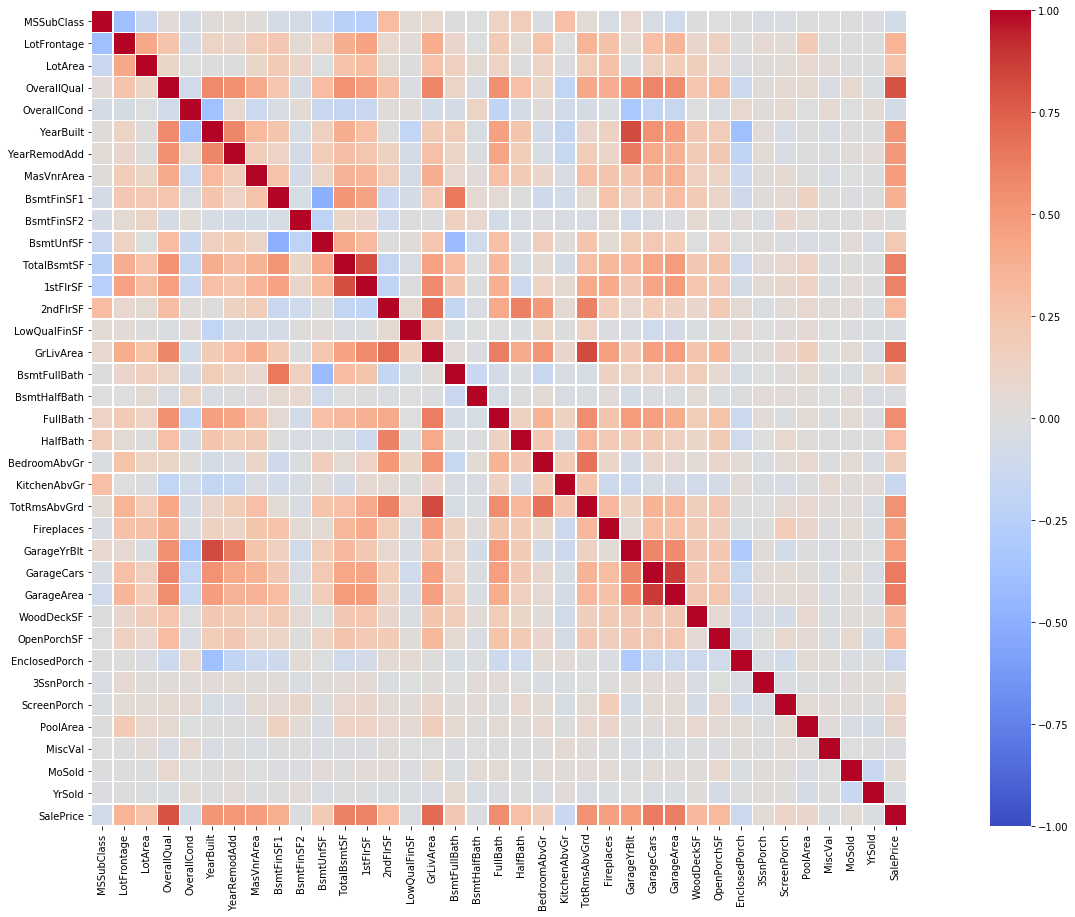

In [16]:
plt.figure(figsize=(30,15))
sns.heatmap(corr, square=True, vmin = -1, vmax = 1,cmap = 'coolwarm', linewidths=.5);

# 2.3 Treat missing values

In [17]:
df.LotFrontage.fillna(df.LotFrontage.mean(), inplace = True)

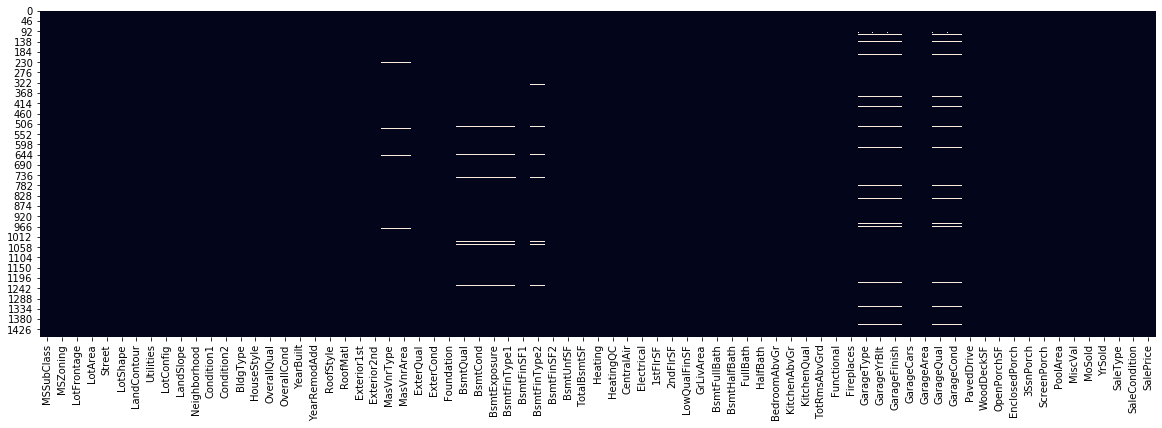

In [18]:
plt.figure(figsize = (20,6))
sns.heatmap(df.isnull(), cbar = False);

In [19]:
df.columns[df.isnull().sum() > 0]

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [20]:
df[['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].isnull().sum()/len(df[['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']])

MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

In [21]:
df.dropna(inplace = True)

In [22]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [23]:
df.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

# 3 Create dummy variables

In [24]:
df1 = pd.get_dummies(df, columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], drop_first=True)

In [25]:
print(df.columns.values)

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle' 'RoofMatl'
 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea' 'ExterQual'
 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'GarageType' 'GarageYrBlt'
 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond'
 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch'
 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold' 'SaleType'
 'SaleCondition' 'SalePrice']


In [26]:
print(df1.columns.values)

['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice' 'MSZoning_FV' 'MSZoning_RH' 'MSZoning_RL' 'MSZoning_RM'
 'Street_Pave' 'LotShape_IR2' 'LotShape_IR3' 'LotShape_Reg'
 'LandContour_HLS' 'LandContour_Low' 'LandContour_Lvl' 'Utilities_NoSeWa'
 'LotConfig_CulDSac' 'LotConfig_FR2' 'LotConfig_FR3' 'LotConfig_Inside'
 'LandSlope_Mod' 'LandSlope_Sev' 'Neighborhood_Blueste'
 'Neighborhood_BrDale' 'Neighborhood_BrkSide' 'Neighborhood_ClearCr'
 'Neighborhood_CollgCr' 'Neighborhood_Crawfor' 'Neighborhood_Edwards'
 'Neighborhood_Gilbert' 'Neighborhood_IDOTRR' 'Neighborhood

# 4. Delete strong correlated columns

In [27]:
corr_matrix = df1.corr().abs()

In [28]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [29]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

In [30]:
to_drop.remove('SalePrice')

In [31]:
to_drop

['1stFlrSF',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'RoofStyle_Hip',
 'RoofStyle_Shed',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'MasVnrType_None',
 'ExterQual_TA',
 'ExterCond_TA',
 'Foundation_PConc',
 'BsmtQual_TA',
 'BsmtCond_TA',
 'BsmtFinType2_Unf',
 'Electrical_Mix',
 'KitchenQual_TA',
 'GarageType_Detchd',
 'GarageQual_TA',
 'GarageCond_TA',
 'SaleType_WD',
 'SaleCondition_Partial']

In [32]:
df1.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
train = df1.drop(to_drop,axis=1)

In [34]:
train.columns.values

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawf

# 5. Partition Data

In [35]:
from sklearn.model_selection import train_test_split
X = train.drop('SalePrice', axis = 1)
y = train.SalePrice

# 6. Build Model

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
RF = RandomForestRegressor()

In [38]:
RF.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# 7. Handle Test Data

In [44]:
test = pd.read_csv('C:\\Users\\Charles Chen\\Desktop\\Python Tutorial 1\\Kaggle\\house-prices-advanced-regression-techniques\\test.csv')

In [45]:
test.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [46]:
test.LotFrontage.fillna(test.LotFrontage.mean(), inplace = True)

In [47]:
test.columns[test.isnull().sum() > 0]

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [48]:
test.BsmtFullBath.dtype

dtype('float64')

In [49]:
test.GarageFinish.isnull().sum()

78

In [50]:
test.SaleType.value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [51]:
test.MSZoning.fillna('RL', inplace = True)
test.Utilities.fillna('AllPub', inplace = True)
test.Exterior1st.fillna('VinylSd', inplace = True)
test.Exterior2nd.fillna('VinylSd', inplace = True)
test.MasVnrType.fillna('None', inplace = True)
test.MasVnrArea.fillna(test.MasVnrArea.mean(), inplace = True)
test.BsmtQual.fillna('TA', inplace = True)
test.BsmtCond.fillna('TA', inplace = True)
test.BsmtExposure.fillna('No', inplace = True)
test.BsmtFinType1.fillna('GLQ', inplace = True)
test.BsmtFinSF1.fillna(test.BsmtFinSF1.mean(), inplace = True)
test.BsmtFinType2.fillna('Unf', inplace = True) 
test.BsmtFinSF2.fillna(test.BsmtFinSF2.mean(), inplace = True)
test.BsmtUnfSF.fillna(test.BsmtUnfSF.mean(), inplace = True)
test.TotalBsmtSF.fillna(test.TotalBsmtSF.mean(), inplace = True)
test.BsmtFullBath.fillna(0.0, inplace = True)
test.BsmtHalfBath.fillna(0.0, inplace = True)
test.KitchenQual.fillna('TA', inplace = True) 
test.Functional.fillna('Typ', inplace = True)
test.GarageType.fillna('Attchd', inplace = True)
test.GarageYrBlt.fillna(2005, inplace = True)
test.GarageFinish.fillna('Unf', inplace = True) 
test.GarageCars.fillna(2, inplace = True)
test.GarageArea.fillna(test.GarageArea.mean(), inplace = True)
test.GarageQual.fillna('TA', inplace = True)
test.GarageCond.fillna('TA', inplace = True)
test.SaleType.fillna('WD', inplace = True)

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [53]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal


In [54]:
test1 = pd.get_dummies(test, columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], drop_first=True)

In [55]:
test1.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0


In [56]:
to_drop

['1stFlrSF',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'RoofStyle_Hip',
 'RoofStyle_Shed',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'MasVnrType_None',
 'ExterQual_TA',
 'ExterCond_TA',
 'Foundation_PConc',
 'BsmtQual_TA',
 'BsmtCond_TA',
 'BsmtFinType2_Unf',
 'Electrical_Mix',
 'KitchenQual_TA',
 'GarageType_Detchd',
 'GarageQual_TA',
 'GarageCond_TA',
 'SaleType_WD',
 'SaleCondition_Partial']

In [57]:
missing_cols = set( train.columns ) - set( test.columns )

In [58]:
extra_cols = set( test1.columns ) - set( train.columns )

In [59]:
extra_cols

{'1stFlrSF',
 'BsmtCond_TA',
 'BsmtFinType2_Unf',
 'BsmtQual_TA',
 'ExterCond_Po',
 'ExterCond_TA',
 'ExterQual_TA',
 'Exterior1st_AsphShn',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Foundation_PConc',
 'Foundation_Slab',
 'GarageArea',
 'GarageCond_TA',
 'GarageQual_TA',
 'GarageType_Detchd',
 'GarageYrBlt',
 'Heating_Wall',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'Id',
 'KitchenQual_TA',
 'MSZoning_RM',
 'MasVnrType_None',
 'Neighborhood_Somerst',
 'RoofStyle_Hip',
 'RoofStyle_Shed',
 'SaleCondition_Partial',
 'SaleType_WD',
 'TotRmsAbvGrd'}

In [60]:
test2 = test1.drop(extra_cols, axis = 1)

In [61]:
test2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,0,0,0,0,0,1
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
missing_cols = set( train.columns ) - set( test2.columns )

In [63]:
missing_cols

{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'GarageQual_Fa',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'SalePrice',
 'Utilities_NoSeWa'}

In [64]:
for c in missing_cols:
    test2[c] = 0

In [65]:
test_final = test2[train.columns]

In [66]:
test_final.columns.values

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawf

In [67]:
train.columns.values

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawf

In [68]:
test_final = test_final.drop('SalePrice', axis =1)

# 8. Make predictions

In [69]:
predictions = RF.predict(test_final)

# 9. Output

In [70]:
outputRF = pd.DataFrame({'Id': test.Id, 'SalePrice': predictions})

In [71]:
outputRF.to_csv('house_submission2.csv', index=False) 